In [ ]:
LEVEL  3---
TASK   3---
TASK:Price Range vs. Online Delivery and Table Booking

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("C:\\Users\\Karthik\\Downloads\\Dataset .csv")

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.97739161,41.02279314,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788.0
9553,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.04129725,41.00984672,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034.0
9554,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.03464001,41.05581715,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661.0
9555,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4,Green,Very Good,901.0


In [ ]:
# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [15]:
# 1. Robust Cleaning: Safely convert Price range and handle anomalies like 'Yellow'
# errors='coerce' will turn 'Yellow' or other non-numeric text into NaN
df['Price_Range_Clean'] = pd.to_numeric(df['Price range'], errors='coerce')

# 2. Filter for standard price ranges (1, 2, 3, 4) and valid Yes/No responses
valid_prices = [1, 2, 3, 4]
valid_services = ['Yes', 'No']

df_clean = df[
    df['Price_Range_Clean'].isin(valid_prices) &
    df['Has Table booking'].isin(valid_services) &
    df['Has Online delivery'].isin(valid_services)
].copy()


Table Booking % by Price Range:
 Price_Range_Clean
1.0     0.022507
2.0     7.687359
3.0    45.706175
4.0    46.837607
Name: Yes, dtype: float64

Online Delivery % by Price Range:
 Price_Range_Clean
1.0    15.777628
2.0    41.331618
3.0    29.169624
4.0     9.059829
Name: Yes, dtype: float64


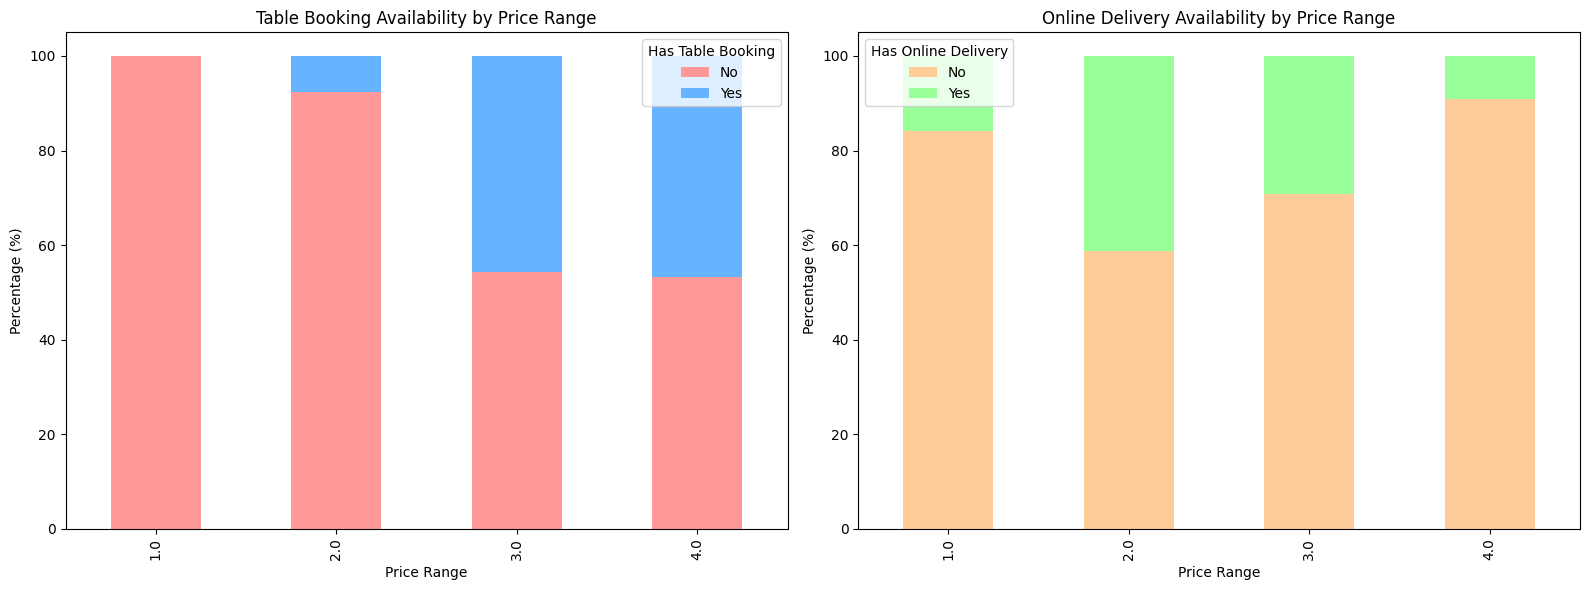

In [16]:
# 3. Create cross-tabulations (percentages) for the relationship
table_booking_pct = pd.crosstab(df_clean['Price_Range_Clean'], df_clean['Has Table booking'], normalize='index') * 100
online_delivery_pct = pd.crosstab(df_clean['Price_Range_Clean'], df_clean['Has Online delivery'], normalize='index') * 100

# 4. Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Table Booking Relationship
table_booking_pct.plot(kind='bar', stacked=True, ax=axes[0], color=['#FF9999', '#66B3FF'])
axes[0].set_title('Table Booking Availability by Price Range')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Price Range')
axes[0].legend(title='Has Table Booking')

# Plot Online Delivery Relationship
online_delivery_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#FFCC99', '#99FF99'])
axes[1].set_title('Online Delivery Availability by Price Range')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Price Range')
axes[1].legend(title='Has Online Delivery')

plt.tight_layout()
plt.savefig('services_by_price_range.png')

# Display numerical summary
print("Table Booking % by Price Range:\n", table_booking_pct['Yes'])
print("\nOnline Delivery % by Price Range:\n", online_delivery_pct['Yes'])

In [ ]:
# Determine if higher-priced restaurants are more likely to offer these services.

--- Table Booking Availability by Price Range ---
Price_Range_Clean
1.0     0.02%
2.0     7.69%
3.0    45.71%
4.0    46.84%
Name: Yes, dtype: object

--- Online Delivery Availability by Price Range ---
Price_Range_Clean
1.0    15.78%
2.0    41.33%
3.0    29.17%
4.0     9.06%
Name: Yes, dtype: object


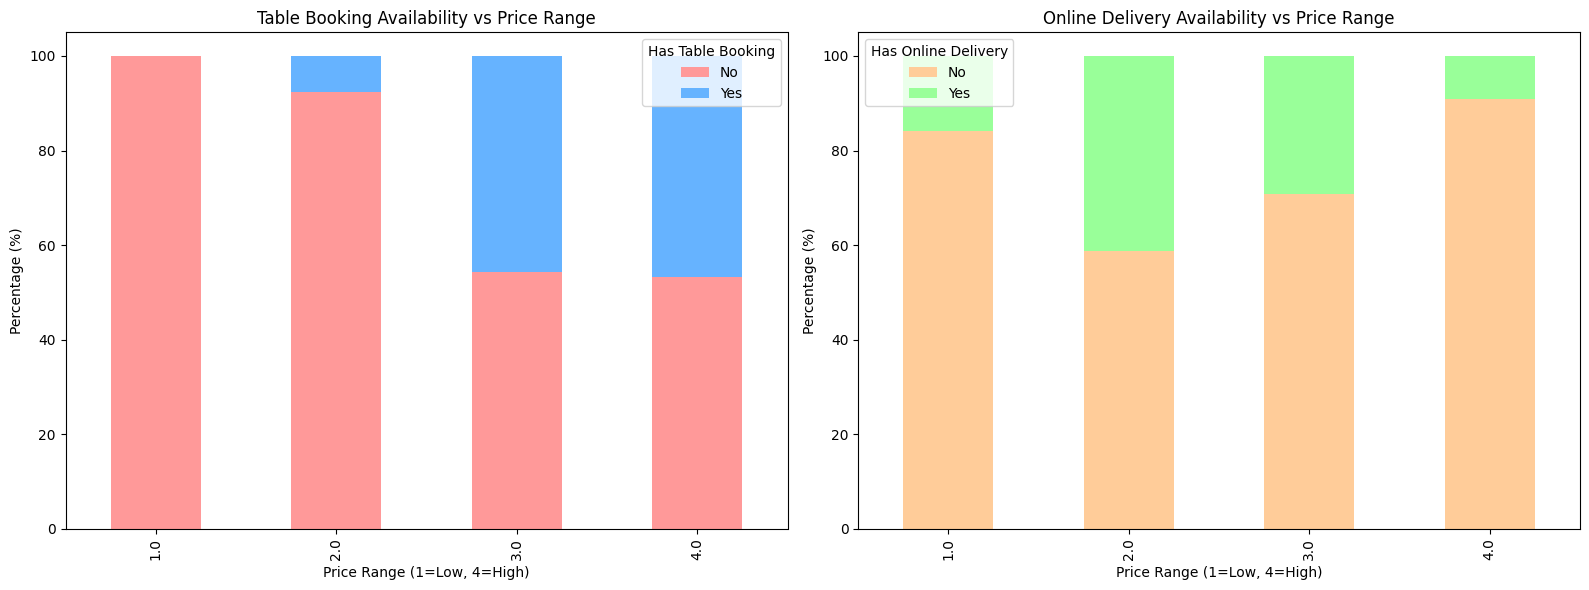

In [22]:
# 1. Data Cleaning
# Use pd.to_numeric with errors='coerce' to safely handle non-numeric values like 'Yellow'
df['Price_Range_Clean'] = pd.to_numeric(df['Price range'], errors='coerce')

# Define valid values for filtering
valid_prices = [1, 2, 3, 4]
valid_services = ['Yes', 'No']

# Filter the dataframe for standard price ranges and valid service labels
df_clean = df[
    df['Price_Range_Clean'].isin(valid_prices) &
    df['Has Table booking'].isin(valid_services) &
    df['Has Online delivery'].isin(valid_services)
].copy()

# 2. Analyze Relationship: Calculate percentages for each service per Price Range
table_booking_pct = pd.crosstab(df_clean['Price_Range_Clean'], df_clean['Has Table booking'], normalize='index') * 100
online_delivery_pct = pd.crosstab(df_clean['Price_Range_Clean'], df_clean['Has Online delivery'], normalize='index') * 100

# 3. Print the results to console (Fixed the formatting)
print("--- Table Booking Availability by Price Range ---")
# Using .map() to apply formatting to each value in the series
print(table_booking_pct['Yes'].map('{:,.2f}%'.format))

print("\n--- Online Delivery Availability by Price Range ---")
print(online_delivery_pct['Yes'].map('{:,.2f}%'.format))

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Table Booking
table_booking_pct.plot(kind='bar', stacked=True, ax=axes[0], color=['#FF9999', '#66B3FF'])
axes[0].set_title('Table Booking Availability vs Price Range')
axes[0].set_xlabel('Price Range (1=Low, 4=High)')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(title='Has Table Booking')

# Subplot 2: Online Delivery
online_delivery_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#FFCC99', '#99FF99'])
axes[1].set_title('Online Delivery Availability vs Price Range')
axes[1].set_xlabel('Price Range (1=Low, 4=High)')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Has Online Delivery')

plt.tight_layout()
plt.savefig('services_by_price_range.png')